#### ADS1 Assignment 3

**Tanvir Ahmed, 20075186**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using WBGAPI importing World Bank data on climate change

In [2]:
import wbgapi as wb         #importing wbgapi as wb 

# To install this API, please run: pip install wbgapi

In [3]:
#             https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE

# Indicator ID for Total greenhouse gas emissions (kt of CO2 equivalent) is 'EN.ATM.GHGT.KT.CE'

greenhouse_emission_ind = 'EN.ATM.GHGT.KT.CE' #assigning the ID to a variable

In [4]:
def wb_data(indicator_id, n):
    """
    This function imports data from the World Bank website for the selected
    indicator and saves as a dataframe in the World Bank data format and it's transposed format. 
    The years are between 1950 and 2021 with n years increment.  
    Argument = indicator_id as string, n is an integer
    """
    
    df = wb.data.DataFrame(indicator_id, time=range(1950, 2021, n))
    
    df.index.name = 'Country'
    df.columns.name = 'Year'
    df.columns = df.columns.str.replace("YR","")
    
    return(df, df.T)

In [5]:
df_CO2 = wb_data(greenhouse_emission_ind, 5)

In [6]:
df_CO2[0].head(5) # The first dataframe in the World Bank format

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
AFW,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [7]:
df_CO2[1].head(5) # The second dataframe with countries as columns

Country,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The country codes in the dataframes don't make proper sense we need to reset the index with proper country names

# The url below contains the country names with their respective codes

url = 'https://docs.google.com/spreadsheets/d/1-HxLssAd2glfU40FWuccMw8758zrJyon6H6qkMjLeZU/edit#gid=0'

url_readable = url.replace('/edit#gid=', '/export?format=csv&gid=')

country_names = pd.read_csv(url_readable)

country_names.head()

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO


In [9]:
def country_code_to_name(df):
    """
    Takes in a dataframe with  country codes as index and 
    changes the index to country names.
    """
    df.index = country_names['Country Name']
    
    return(df)

In [10]:
country_code_to_name(df_CO2[0])

df_CO2[0].head(5)

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
Africa Western and Central,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [11]:
df_CO2[1].columns = country_names['Country Name']
df_CO2[1].head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
countries_of_interest = ['Bangladesh', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'India', 
                         'Nigeria', 'Russia', 'South Africa', 'Sweden', 'United Kingdom', 'United States']

In [13]:
# China, United States, India, Russia and Brazil are the most CO2 producing countries from the list.

In [14]:
# Constructing a dataframe with climate change indicators of interest for the listed countries.

total_pop = 'SP.POP.TOTL'             # Total population

rural_pop = 'SP.RUR.TOTL.ZS'          # Rural population (% of total population)

urban_pop = 'SP.URB.TOTL.IN.ZS'       # Urban population (% of total population)

forest_area = 'AG.LND.FRST.ZS'        # Forest area (% of land area)

arable_land = 'AG.LND.ARBL.ZS'        # Arable land (% of land area)

manufacturing = 'NV.IND.MANF.ZS'      # Manufacturing, value added (% of GDP)

gdp = 'NY.GDP.MKTP.CD'                # Total GDP (current USD)  

elec_consump = 'EG.USE.ELEC.KH.PC'    # Electric power consumption (kWh per capita)


In [15]:
df_pop = wb_data(total_pop, 5)

country_code_to_name(df_pop[0])

df_total_pop = df_pop[0].loc[countries_of_interest]

#df_total_pop.head()

In [16]:
df_r = wb_data(rural_pop, 5)

country_code_to_name(df_r[0])

df_rural = df_r[0].loc[countries_of_interest]

#df_rural.head()

In [17]:
df_u = wb_data(urban_pop, 5)

country_code_to_name(df_u[0])

df_urban = df_u[0].loc[countries_of_interest]

#df_urban.to_csv('urban.csv')

#df_urban

In [18]:
df_f = wb_data(forest_area, 5)

country_code_to_name(df_f[0])

df_forest = df_f[0].loc[countries_of_interest]

#df_forest.drop(['1960','1965','1970','1975','1980','1985'], axis=1).head(5) # removed the years without proper data

In [19]:
df_a = wb_data(arable_land, 5)

country_code_to_name(df_a[0])

df_arable = df_a[0].loc[countries_of_interest]

#df_arable.drop(['1960'], axis=1).head()

In [20]:
df_m = wb_data(manufacturing, 5)

country_code_to_name(df_m[0])

df_manufacturing = df_m[0].loc[countries_of_interest]

#df_manufacturing.head()

In [21]:
df_g = wb_data(gdp, 5)

country_code_to_name(df_g[0])

df_gdp = df_g[0].loc[countries_of_interest]

#df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1).head()

In [22]:
df_gr = wb_data(greenhouse_emission_ind, 5)

country_code_to_name(df_gr[0])

df_greenhouse = df_gr[0].loc[countries_of_interest]

#df_greenhouse

In [23]:
df_elec_consump = wb_data(elec_consump, 5)

country_code_to_name(df_elec_consump[0])

df_electricity = df_elec_consump[0].loc[countries_of_interest]

#df_total_pop.head()

In [24]:
tot_emission = df_CO2[0].loc[countries_of_interest].drop(['1960','1965','1970','1975','1980','1985','2020'], axis=1)

In [25]:
tot_gdp = df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1)

In [26]:
C = tot_emission*1000*1000 / tot_gdp
C

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Bangladesh,2.922938,2.717994,2.103250,1.848856,1.352978,0.936033
Brazil,1.520120,0.880945,1.168056,0.996968,0.446588,0.600762
Canada,0.942603,1.002861,0.901966,0.601036,0.416856,0.454819
China,8.929470,5.808798,3.795304,3.147239,1.676285,1.072118
Ecuador,2.219265,1.695256,2.311247,1.247739,0.888501,0.668947
France,0.396122,0.310419,0.372397,0.231717,0.177980,0.176346
India,3.820935,4.045137,3.666906,2.400931,1.530262,1.456393
Nigeria,3.725864,4.920968,2.732230,1.331088,0.649954,0.569306
Russia,6.291951,5.810200,8.449189,3.106108,1.609267,1.815713


In [27]:
"""
# Creating a pie-chart for 2015 emissions data  
df_greenhouse.plot.pie(y='2015', figsize=(10, 8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

"""

"\n# Creating a pie-chart for 2015 emissions data  \ndf_greenhouse.plot.pie(y='2015', figsize=(10, 8), cmap='Set3')\nplt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))\nplt.tight_layout()\n\n"

<AxesSubplot:title={'center':'Total GDP (USD)'}, xlabel='Country Name', ylabel='GDP (USD)'>

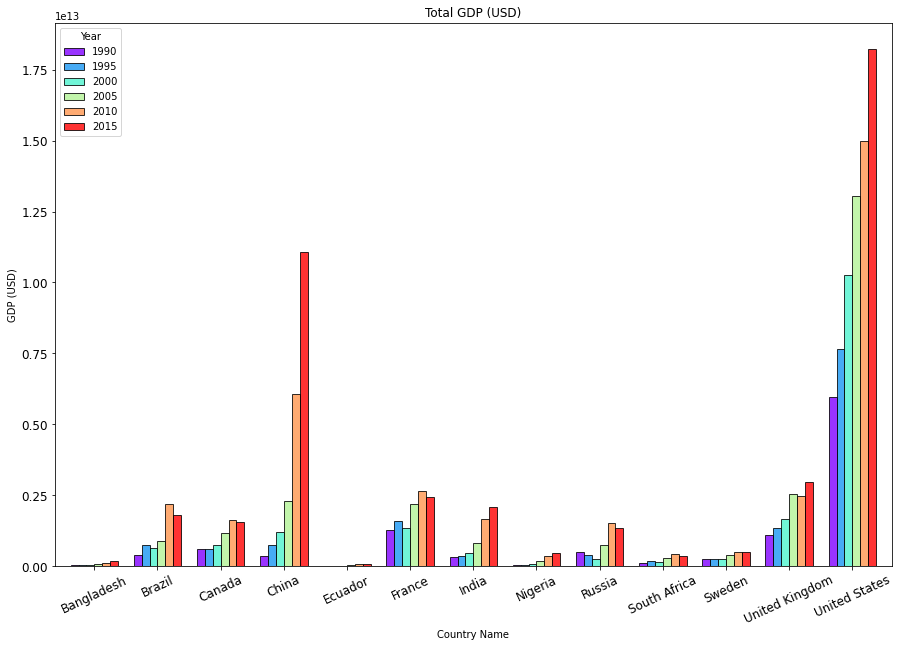

In [28]:
tot_gdp.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='GDP (USD)', fontsize=12, alpha=0.8, 
             stacked=False, width = 0.75, title='Total GDP (USD)', colormap='rainbow', edgecolor='black', rot=25)

<AxesSubplot:title={'center':'Greenhouse gas emission by countries'}, xlabel='Country Name', ylabel='KT of CO2 equivalent'>

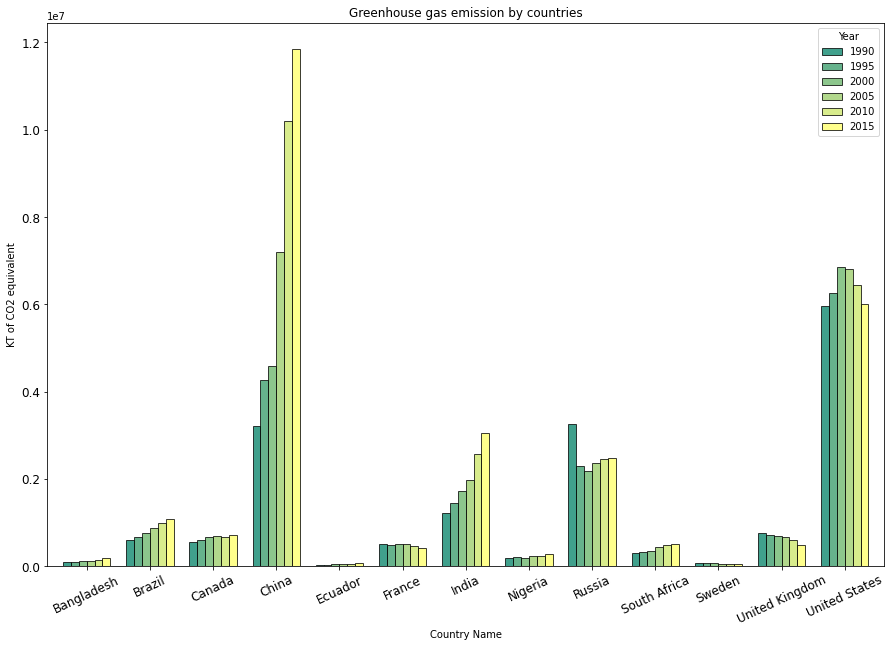

In [29]:
tot_emission.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='KT of CO2 equivalent', fontsize=12, alpha=0.75, 
                                stacked=False, width = 0.75, title='Greenhouse gas emission by countries', 
                                colormap='summer', edgecolor='black', rot=25)

In [30]:
#plt.scatter(df_urban.drop('World'), df_forest.drop('World'))

In [31]:
tot_emission.corrwith(tot_gdp, axis=1)

Country Name
Bangladesh        0.977238
Brazil            0.871741
Canada            0.753919
China             0.949859
Ecuador           0.960546
France           -0.669921
India             0.983036
Nigeria           0.897058
Russia           -0.008818
South Africa      0.974697
Sweden           -0.889807
United Kingdom   -0.886152
United States     0.056652
dtype: float64

In [32]:
# France, Russia, Sweden and the UK total greenhouse gas emission has negative correlations with the total GDP.
# The US doesn't have any correlation between the two factors.
# The rest of the countries from the list have strong correlations.

--------------------------------------------------------------------------------------------------

In [33]:
#df_forest.columns

In [34]:
#df_forest.columns[1:]

In [35]:
#df_forest.iloc[2:, 6]

In [36]:
#df_forest[['1980', '1985', '1990', '1995']]

In [37]:
#new_test_df = df_forest[['1980', '1985', '1990', '1995']].copy()
#new_test_df

In [38]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    mean_val = np.mean(array)
    min_val = np.min(array)
    max_val = np.max(array)
    
    #scaled = (array-min_val) / (max_val-min_val)
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    df_norm = df.copy()
    # iterate over all columns
    for col in df.columns[:]:     
        df_norm[col] = norm(df[col])
        
    return df_norm

In [39]:
df_greenhouse_norm = norm_df(df_greenhouse)[['1990', '1995', '2000', '2005', '2010', '2015']]

In [40]:
df_urban_norm2 = norm_df(df_urban)[['1990', '1995', '2000', '2005', '2010', '2015']]

In [41]:
norm_df(df_gdp).shape

(13, 13)

In [42]:
#df_CO2[0].plot(df_CO2[0].columns, df_CO2[['1990', '1995', '2000', '2005', '2010', '2015']], kind='scatter')

In [43]:
#df_CO2[0][['1990', '1995', '2000', '2005', '2010', '2015']].plot()

In [44]:
#df_CO2[1].plot(figsize=(10,8))
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [45]:
#C['2015'].plot(figsize=(12,10))

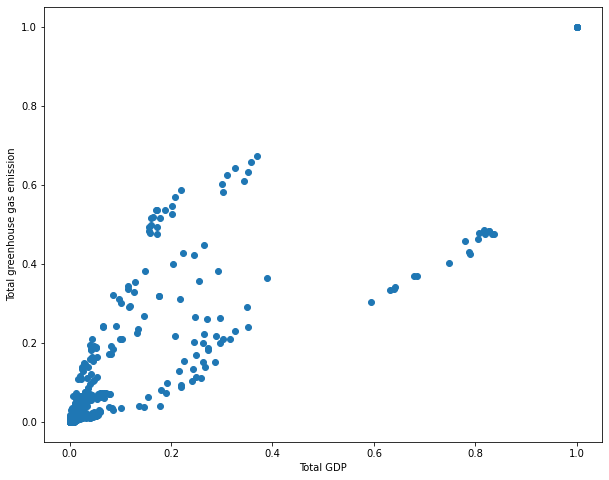

In [46]:
plt.figure(figsize=(10,8))

plt.scatter(norm_df(df_g[0])[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_gr[0])[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('Total GDP')
plt.ylabel('Total greenhouse gas emission')

#plt.legend(loc=0)

plt.show()

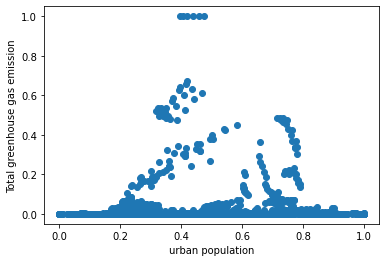

In [47]:
plt.figure()

plt.scatter(norm_df(df_u[0])[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_gr[0])[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('urban population')
plt.ylabel('Total greenhouse gas emission')

plt.show()

In [48]:
# Removing entries which are aggregate and not to be analysed for this work

url2 = 'https://docs.google.com/spreadsheets/d/1VXxnOpxxKcMdfitckG6jFwX3YjNg5dO8e8Gr3hpaaNs/edit#gid=0'

url_readable2 = url2.replace('/edit#gid=', '/export?format=csv&gid=')

country_names_to_exclude = pd.read_csv(url_readable2)

#list(country_names_to_exclude['Country Name'])

In [49]:

df_urban_x = df_u[0].drop(list(country_names_to_exclude['Country Name']))

df_green_x = df_gr[0].drop(list(country_names_to_exclude['Country Name']))

df_gdp_x = df_g[0].drop(list(country_names_to_exclude['Country Name']))

df_total_pop_x = df_pop[0].drop(list(country_names_to_exclude['Country Name']))#

df_urban_x = df_u[0].drop(list(country_names_to_exclude['Country Name']))

df_arable_x = df_a[0].drop(list(country_names_to_exclude['Country Name']))

df_electricity_x = df_elec_consump[0].drop(list(country_names_to_exclude['Country Name']))


In [50]:

df_cluster_test = pd.DataFrame()

df_cluster_test['Population 2015'] = df_total_pop_x['2015']

df_cluster_test['Total GDP 2015 (USD)'] = df_gdp_x['2015']

df_cluster_test['Total CO2 2015 (KT)'] = df_green_x['2015']

df_cluster_test['Urban population 2015'] = df_total_pop_x['2015']* df_urban_x['2015']/100

df_cluster_test['Arable land 2015'] = df_arable_x['2015']

#df_cluster_test['Electricity consumption 2010'] = df_electricity_x['2010']


In [51]:
df_cluster_test = df_cluster_test.dropna(subset=['Total CO2 2015 (KT)']).copy()

In [52]:
df_cluster_test['Total GDP 2015 (USD)'] /= df_cluster_test['Population 2015']
df_cluster_test['Total CO2 2015 (KT)'] /= df_cluster_test['Population 2015']

In [53]:
df_cluster_test['Total CO2 2015 (KT)'].idxmax()

'Brunei Darussalam'

In [54]:
df_cluster_test.rename(columns={'Total GDP 2015 (USD)':'GDP per capita 2015 (USD)', 
                                'Total CO2 2015 (KT)':'CO2  per capita 2015 (KT)'}, inplace=True)

<AxesSubplot:xlabel='GDP per capita', ylabel='CO2 emission per capita (KT)'>

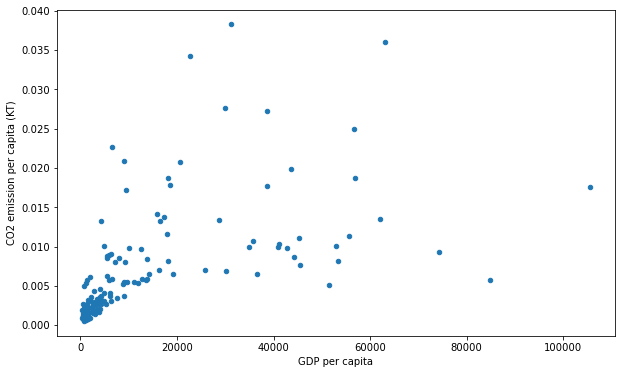

In [55]:
df_cluster_test.plot('GDP per capita 2015 (USD)', 'CO2  per capita 2015 (KT)', kind='scatter', xlabel = 'GDP per capita',
                    ylabel = 'CO2 emission per capita (KT)', figsize=(10,6))

In [56]:
#norm_df(df_cluster_test).plot('Total GDP 2015 (USD)', 'Total CO2 2015 (KT)', kind='scatter', figsize=(10,8), )

In [57]:
# Normalising the Cluster DataFrame for Kmeans clustering 

df_cluster = norm_df(df_cluster_test)

In [58]:
df_cluster

,Population 2015,GDP per capita 2015 (USD),CO2 per capita 2015 (KT),Urban population 2015,Arable land 2015
Country Name,,,,,
Afghanistan,0.024932,0.001669,0.058023,0.011137,0.199066
Angola,0.020200,0.036033,0.071966,0.023093,0.064808
Albania,0.002080,0.033995,0.076457,0.002152,0.377016
United Arab Emirates,0.006705,0.364316,0.709163,0.010354,0.009014
Argentina,0.031250,0.127601,0.208588,0.051527,0.240034
...,...,...,...,...,...
Samoa,0.000132,0.035128,0.070751,0.000039,0.191920
"Yemen, Rep.",0.019195,0.011622,0.011903,0.012024,0.034871
South Africa,0.040131,0.055949,0.225582,0.046877,0.165318


In [59]:
#A.to_csv('A.csv') #to invstigate the data

<AxesSubplot:xlabel='GDP per capita 2015 (USD)', ylabel='CO2  per capita 2015 (KT)'>

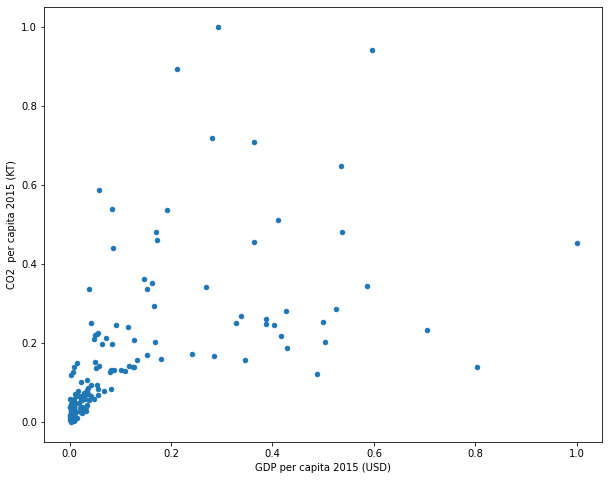

In [60]:
df_cluster.plot('GDP per capita 2015 (USD)', 'CO2  per capita 2015 (KT)', kind='scatter', figsize=(10,8))

In [61]:
len(df_cluster[(df_cluster['GDP per capita 2015 (USD)'] < 0.3) & (df_cluster['GDP per capita 2015 (USD)'] > 0.2)])

6

In [62]:
#df_cluster_test.plot('Population 2015', 'Total CO2 2015 (KT)', kind='scatter', figsize = (20,15))

In [63]:
df_cluster_test['Population 2015'].sort_values(ascending=False)

Country Name
China            1.379860e+09
India            1.310152e+09
United States    3.207390e+08
Indonesia        2.583833e+08
Brazil           2.044718e+08
                     ...     
Tonga            1.007800e+05
Dominica         7.117500e+04
Palau            1.766500e+04
Tuvalu           1.109900e+04
Eritrea                   NaN
Name: Population 2015, Length: 150, dtype: float64

In [64]:
df_cluster.dropna(axis=0, inplace=True)

<AxesSubplot:xlabel='CO2  per capita 2015 (KT)', ylabel='GDP per capita 2015 (USD)'>

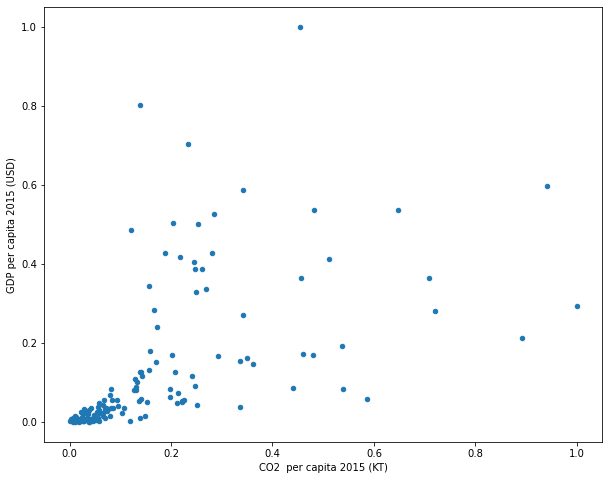

In [65]:
df_cluster.plot('CO2  per capita 2015 (KT)', 'GDP per capita 2015 (USD)', kind='scatter', figsize=(10,8))

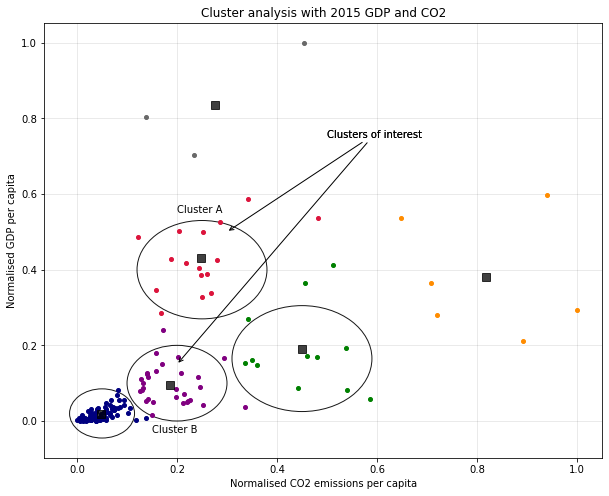

In [66]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=6)     # Selecting a high number of clusters as the data isn't showing many clear groupings 

# extract columns for fitting
df_fit = df_cluster[['CO2  per capita 2015 (KT)', 'GDP per capita 2015 (USD)']].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10.0,8.0))
plt.grid('both',color='black', linestyle='solid', alpha=0.1)

col = ["navy", "crimson", "green", "darkorange", "purple", "dimgray"]
for l in range(6):     # loop over the different labels
    plt.plot(df_fit['CO2  per capita 2015 (KT)'][labels==l], df_fit['GDP per capita 2015 (USD)'][labels==l], "o", 
             markersize=4, color=col[l])
    
# show cluster centres
for ic in range(6):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "sk", markersize=8, alpha=0.75)     #"sk": s for square k for color black
    
plt.xlabel("Normalised CO2 emissions per capita")
plt.ylabel("Normalised GDP per capita")

# Drawing circles around the selected clusters 

circle1 = plt.Circle((0.05, 0.02), 0.065, facecolor='w', alpha=0.9, edgecolor='black')
plt.gca().add_patch(circle1)

circle2 = plt.Circle((0.2, 0.1), 0.1, facecolor='w', alpha=0.9, edgecolor='black')
plt.gca().add_patch(circle2)

circle3 = plt.Circle((0.25, 0.4), 0.13, facecolor='w', alpha=0.9, edgecolor='black')
plt.gca().add_patch(circle3)

circle4 = plt.Circle((0.45, 0.165), 0.14, facecolor='w', alpha=0.9, edgecolor='black')
plt.gca().add_patch(circle4)

plt.annotate('Cluster A', xy=(0.2, 0.55))
plt.annotate('Clusters of interest', xy=(0.3, 0.5), xytext=(0.5, 0.75), arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.annotate('Cluster B', xy=(0.15, -0.03))
plt.annotate('Clusters of interest', xy=(0.2, 0.15), xytext=(0.5, 0.75), arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.title("Cluster analysis with 2015 GDP and CO2")

plt.savefig("Cluster analysis with 2015 GDP and CO2.png", dpi=720)
plt.show()

In [67]:
cen

array([[0.04770975, 0.01860433],
       [0.2480966 , 0.43035475],
       [0.45009478, 0.18911853],
       [0.81827679, 0.3803299 ],
       [0.18593539, 0.09630718],
       [0.27527034, 0.83570718]])

In [68]:
# The centres are a litte off the selected cluster area due to the outliers.

In [69]:
# Identifying the countries for the Cluster A

gdp_range = df_cluster[(df_cluster['GDP per capita 2015 (USD)'] > 0.3) & (df_cluster['GDP per capita 2015 (USD)'] < 0.5)]

co2_range = df_cluster[(df_cluster['CO2  per capita 2015 (KT)'] > 0.175) & (df_cluster['CO2  per capita 2015 (KT)'] < 0.275)]

# gdp_range only filters by the gdp and co2_range does the same for only CO2 emissions per capita.
# need to find the common countries between the 2 sets.

In [70]:
len(co2_range.index)

22

In [71]:
# Selecting the index values for the common countries between gdp_range and co2_range to find countries within Cluster 1 

idx1 = gdp_range.index.intersection(co2_range.index)    # ".intersection" method finds the intersection of two Index objects
print (idx1)                                            # in this case the index objects are from the dataframes

Index(['Austria', 'Belgium', 'Germany', 'Finland', 'United Kingdom', 'Israel',
       'Japan'],
      dtype='object', name='Country Name')


In [72]:
#list(co2_range.index)

In [73]:
#list(gdp_range.index)

In [88]:
# The actual values for the selected cluster

df_cluster_test.loc[idx1]

,Population 2015,GDP per capita 2015 (USD),CO2 per capita 2015 (KT),Urban population 2015,Arable land 2015
Country Name,,,,,
Austria,8642699.0,44195.817595,0.008733,4.988134e+06,16.312409
Belgium,11274196.0,41008.296719,0.009892,1.103473e+07,27.394320
Germany,81686611.0,41103.256436,0.010375,6.306206e+07,33.956315
Finland,5479531.0,42801.908117,0.009773,4.669930e+06,7.378171
United Kingdom,65116219.0,45404.567773,0.007644,5.380293e+07,24.846030
Israel,8380100.0,35808.436429,0.010681,7.724692e+06,13.733826
Japan,127141000.0,34960.639384,0.009950,1.161827e+08,11.536351


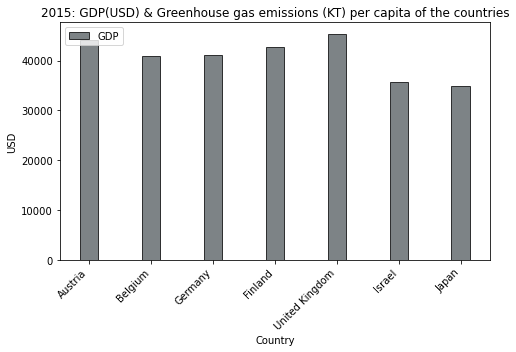

In [96]:
plt.figure(figsize=(7,5))

#ax = plt.axes(facecolor='#F0FFFF')  # adding this axis to set custom background color
#ax.set_axisbelow(True)              # setting the axis below my primary axis so that the grid and the background is behind
#plt.grid(color='black', linestyle='solid', alpha=0.1)  # Specifying the grid

plt.bar(df_cluster_test.loc[idx1].index, np.array(df_cluster_test.loc[idx1]['GDP per capita 2015 (USD)']).reshape(7), 
        label='GDP', color='#52595D', alpha=0.75, edgecolor='black', width=0.3)

#plt.bar(df_cluster_test.loc[idx1].index, np.array(df_cluster_test.loc[idx1]['CO2  per capita 2015 (KT)']).reshape(7), 
#        label='CO2', color='red', alpha=0.75, edgecolor='black', align='edge', width=0.3)

plt.xticks(rotation=45, ha='right')

plt.xlabel("Country")
plt.ylabel("USD")

plt.title("2015: GDP(USD) & Greenhouse gas emissions (KT) per capita of the countries")
plt.legend(loc=2)

plt.tight_layout()
plt.show()

#### 'Austria', 'Belgium', 'Finland', 'Germany', 'Israel', 'Japan' and 'United Kingdom' have similarities in GDP and greenhouse gas emissions.

In [76]:
# Fitting data to create a model and forecast the CO2 emission per capita for Germany.

In [77]:
import scipy.optimize as opt

In [78]:
greenhouse_emission_ind = 'EN.ATM.GHGT.KT.CE' #Total greenhouse gas emissions (kt of CO2 equivalent)

gdp = 'NY.GDP.MKTP.CD'                # Total GDP (current USD)  

In [79]:
countries_gdp = wb_data(gdp, 1)

country_code_to_name(countries_gdp[0])

countries_gdp[0].head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,3.031384e+10,3.137555e+10,3.418718e+10,3.924842e+10,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,1.688209e+10,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [98]:
# GDP dataframe for United Kingdom

ger_gdp = countries_gdp[0].loc['Germany']

ger_gdp = ger_gdp.reset_index()

ger_gdp = ger_gdp.dropna()

ger_gdp.rename(columns={'Germany':'Germany Total GDP (USD)'}, inplace=True)

ger_gdp.head()

,Year,Germany Total GDP (USD)
10,1970,2.158384e+11
11,1971,2.499851e+11
12,1972,2.998015e+11
13,1973,3.983740e+11
14,1974,4.453035e+11


<AxesSubplot:xlabel='Year'>

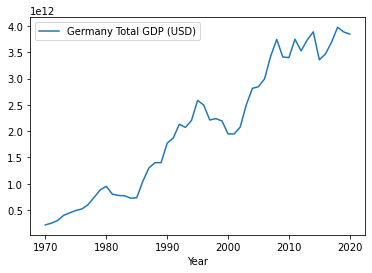

In [81]:
ger_gdp.plot('Year', 'Germany Total GDP (USD)')

In [106]:
# Fitting the GDP curve

In [143]:
def exponential(t, n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    
    t = t - 1970.0
    f = n0 * np.exp(g*t)
    
    return f

In [144]:
ger_gdp["Year"] = pd.to_numeric(ger_gdp["Year"])

param, covar = opt.curve_fit(exponential, ger_gdp["Year"], ger_gdp['Germany Total GDP (USD)'], 
                             p0=(2.158384e+11, 0.2))

In [145]:
print(*param)

725108348125.8024 0.03665992968252029


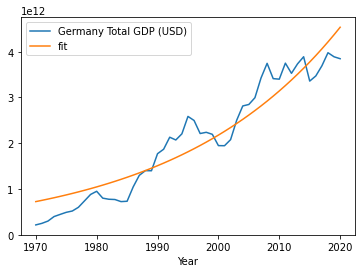

In [147]:
ger_gdp["fit"] = exponential(ger_gdp["Year"], *param)

ger_gdp.plot("Year", ["Germany Total GDP (USD)", "fit"])
plt.show()

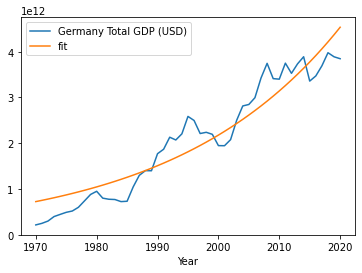

In [148]:
param, covar = opt.curve_fit(exponential, ger_gdp["Year"], ger_gdp['Germany Total GDP (USD)'], 
                             p0=(502557454010.45966, 0.03666017550937027))

ger_gdp["fit"] = exponential(ger_gdp["Year"], *param)

ger_gdp.plot("Year", ["Germany Total GDP (USD)", "fit"])
plt.show()

In [149]:
param

array([7.25103568e+11, 3.66601027e-02])

In [117]:
# The explnential function isn't showing a good fit

In [150]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [156]:
param, covar = opt.curve_fit(logistic, ger_gdp['Year'], ger_gdp['Germany Total GDP (USD)'], 
                             p0=(3e12, 0.03, 2007.0))

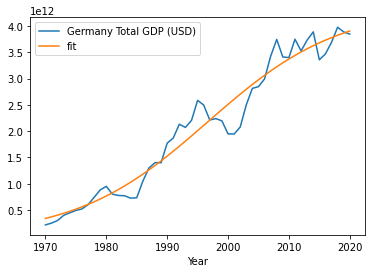

In [158]:
ger_gdp["fit_log"] = logistic(ger_gdp["Year"], *param)

ger_gdp.plot("Year", ["Germany Total GDP (USD)", "fit"])
plt.show()

In [155]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper

[2.57058369e+11 8.69775199e-03 1.71220115e+00]


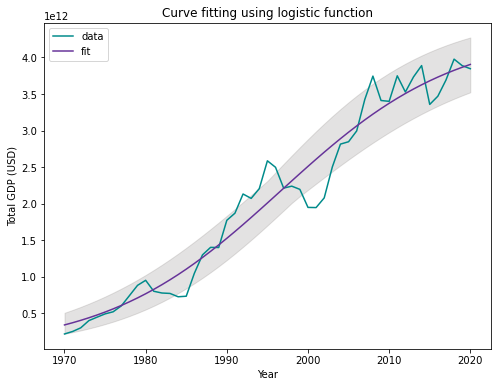

In [197]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(ger_gdp['Year'], logistic, param, sigma)

plt.figure(figsize=(8,6))
plt.title("Curve fitting using logistic function")
plt.plot(ger_gdp['Year'], ger_gdp['Germany Total GDP (USD)'], color='#008B8B', label="data")
plt.plot(ger_gdp['Year'], ger_gdp["fit_log"], color='#663399', label="fit")

plt.fill_between(ger_gdp['Year'], low, up, color='#49413F', alpha=0.15)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total GDP (USD)")
plt.show()

In [166]:
print("Forcasted GDP")
low, up = err_ranges(2030, logistic, param, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistic, param, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistic, param, sigma)
print("2050 between ", low, "and", up)

Forcasted GDP
2030 between  3828388672471.7256 and 4483500870272.654
2040 between  3977147718411.175 and 4564777770384.942
2050 between  4045072602625.441 and 4595027780522.81


In [82]:
# CO2 dataframe for United Kingdom

countries_co2 = wb_data(greenhouse_emission_ind, 1)

country_code_to_name(countries_co2[0])

ger_co2 = countries_co2[0].loc['Germany']

ger_co2 = ger_co2.reset_index()

In [83]:
ger_co2 = ger_co2.dropna()

In [97]:
ger_co2.rename(columns={'Germany':'Germany Total CO2 (KT)'}, inplace=True)
ger_co2.head()

,Year,Germany Total CO2 (KT)
30,1990,1160210.0
31,1991,1130620.0
32,1992,1082930.0
33,1993,1075230.0
34,1994,1062350.0


<AxesSubplot:xlabel='Year'>

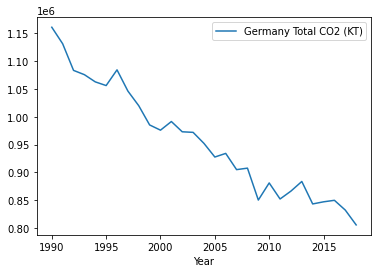

In [85]:
ger_co2.plot('Year', 'Germany Total CO2 (KT)')